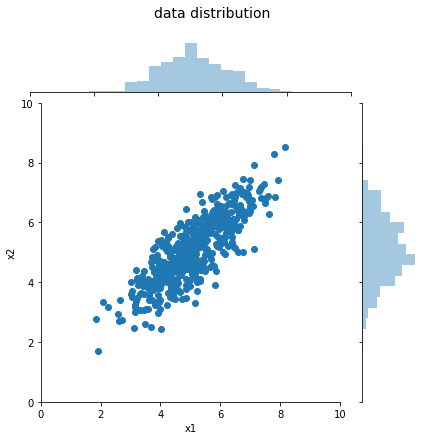

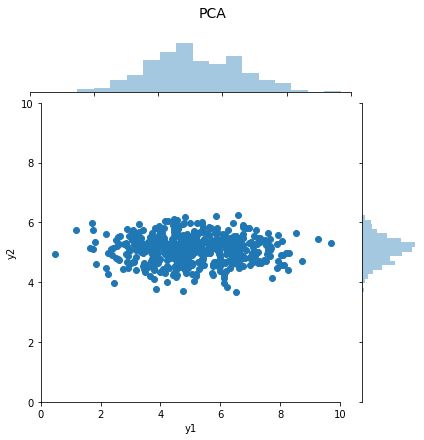


混合行列 第1主成分のみ
[[0.70735135 0.        ]
 [0.70686213 0.        ]]

混合行列 第2主成分のみ
[[ 0.         -0.70686213]
 [ 0.          0.70735135]]


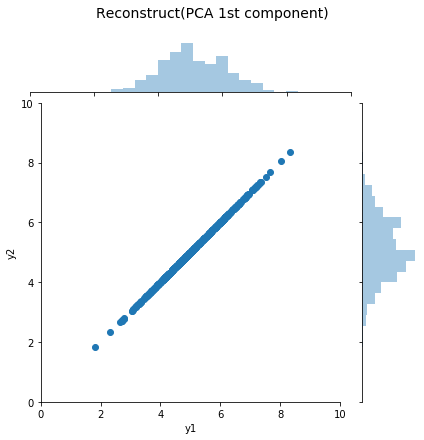

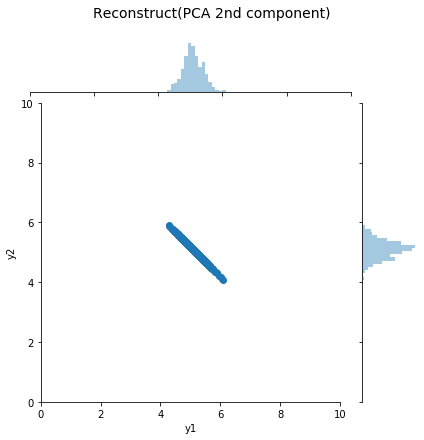

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from numpy.random import *
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

# seed fix
np.random.seed(seed=123456)

#----------------------------------------------------------------------
# シミュレーション用データ生成
#----------------------------------------------------------------------
# 多変量正規分布に従う乱数生成 mu=平均, sigma=分散行列
mu = [5, 5]
sigma = [[1, 0.8],
         [0.8, 1]] #単位行列の場合は丸の形になる
x_org = multivariate_normal(mu, sigma, 500)
# print(x_org.shape)
#pd.DataFrame(x).to_csv('some.csv')
#print(np.corrcoef(x.T)) # 相関

# 散布図
grid = sns.jointplot(x_org[:,0], x_org[:,1])
grid.ax_joint.set_xlabel('x1')
grid.ax_joint.set_ylabel('x2')
grid.ax_joint.set_xlim((0,10))
grid.ax_joint.set_ylim((0,10))
grid.ax_joint.set_aspect('equal')
plt.subplots_adjust(top=0.9)
plt.suptitle('data distribution',  fontsize = 14)
plt.show(grid)
grid.savefig("signal_2D.png", dpi=200)

# データの前処理
# 単位は同じデータとして平均を引く
df = pd.DataFrame(x_org)
avg = df.mean().values
sc = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=False)
x = sc.fit_transform(df)

#----------------------------------------------------------------------
# 特異値分解によるPCA
#----------------------------------------------------------------------
U, S, VT = np.linalg.svd(x)
# x = W^-1 y to principal space
pca = np.dot(VT, x.T)

pca_w_avg = pca.T + avg
grid = sns.jointplot(pca_w_avg[:,0], pca_w_avg[:,1])
grid.ax_joint.set_xlabel('y1')
grid.ax_joint.set_ylabel('y2')
grid.ax_joint.set_xlim((0,10))
grid.ax_joint.set_ylim((0,10))
grid.ax_joint.set_aspect('equal')
plt.subplots_adjust(top=0.9)
plt.suptitle('PCA',  fontsize = 14)
plt.show(grid)
grid.savefig("pca_2D.png", dpi=200)

#----------------------------------------------------------------------
# 再構成
#----------------------------------------------------------------------
VT1 = VT.T.copy()
VT2 = VT.T.copy()
VT1[:,1] =0
VT2[:,0] =0
print("\nmixig matrix 1st component")
print(VT1)
print("\nmixig matrix 2nd component")
print(VT2)

r1 = np.dot(VT1, pca).T + avg
r2 = np.dot(VT2, pca).T + avg

grid = sns.jointplot(r1[:,0], r1[:,1])
grid.ax_joint.set_xlabel('y1')
grid.ax_joint.set_ylabel('y2')
grid.ax_joint.set_xlim((0,10))
grid.ax_joint.set_ylim((0,10))
grid.ax_joint.set_aspect('equal')
plt.subplots_adjust(top=0.9)
plt.suptitle('Reconstruct(PCA 1st component)',  fontsize = 14)
plt.show(grid)
grid.savefig("pca_2D_reconstruct_1st.png", dpi=200)

grid = sns.jointplot(r2[:,0], r2[:,1])
grid.ax_joint.set_xlabel('y1')
grid.ax_joint.set_ylabel('y2')
grid.ax_joint.set_xlim((0,10))
grid.ax_joint.set_ylim((0,10))
grid.ax_joint.set_aspect('equal')
plt.subplots_adjust(top=0.9)
plt.suptitle('Reconstruct(PCA 2nd component)',  fontsize = 14)
plt.show(grid)
grid.savefig("pca_2D_reconstruct_2nd.png", dpi=200)

# MEMO:scikitlearnを使う場合のPCA
#pca = PCA(n_components=1) #主成分を上から分取り出す
#feature = pca.fit_transform(dfs)
#r = pca.inverse_transform(feature)
#r = r + avg
#reconstruct = pd.DataFrame(r)